___
# Stochastic Gradient Descent (SGD_v2)
## Loss function, optimizer, learning rate & batch size
## Fuel dataset
___

## Importing dependencies and transforming the data

In [12]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

data = 'C:/Users/crist/Desktop/Python_Stuff/fuel.csv'

fuel = pd.read_csv(data)

X = fuel.copy()
y = X.pop('FE')

preprocessor = make_column_transformer (
(StandardScaler(), make_column_selector(dtype_include = np.number)),
(OneHotEncoder(sparse = False),
make_column_selector(dtype_include = object))

)

X = preprocessor.fit_transform(X)
y = np.log(y)

input_shape = [X.shape[1]]

In [ ]:
# Original data
fuel.head()

In [14]:
# Processed features
pd.DataFrame(X[:5,:]).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Defining the network for the model

In [16]:
model = keras.Sequential([
    layers.Dense(128, activation = 'relu', input_shape = input_shape),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1)
])

## Adding Loss and Optimizer

In [18]:
model.compile(
optimizer = 'adam',
loss = 'mae'
)

## Training model

In [20]:
history = model.fit(
    X, y,
    batch_size= 128,
    epochs = 200)


Epoch 1/200
9/9 [==============================] - 1s 5ms/step - loss: 3.1189
Epoch 2/200
9/9 [==============================] - 0s 3ms/step - loss: 1.2184
Epoch 3/200
9/9 [==============================] - 0s 3ms/step - loss: 0.7904
Epoch 4/200
9/9 [==============================] - 0s 3ms/step - loss: 0.4339
Epoch 5/200
9/9 [==============================] - 0s 4ms/step - loss: 0.3011
Epoch 6/200
9/9 [==============================] - 0s 4ms/step - loss: 0.2060
Epoch 7/200
9/9 [==============================] - 0s 3ms/step - loss: 0.1621
Epoch 8/200
9/9 [==============================] - 0s 3ms/step - loss: 0.1213
Epoch 9/200
9/9 [==============================] - 0s 3ms/step - loss: 0.1069
Epoch 10/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0895
Epoch 11/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0787
Epoch 12/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0787
Epoch 13/200
9/9 [==============================] - 0s 3ms/st

## Checking the training loss curve

<AxesSubplot:>

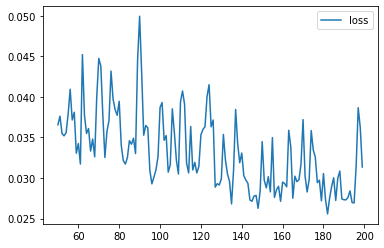

In [25]:
history_df = pd.DataFrame(history.history)
# Started at epoch 50, it can be changed to get other views
history_df.loc[50:, ['loss']].plot()